# Detailed Data Cleaning/Visualization

Things to try
1. the threshold of age groups might be improved
2. `ind_nuevo` should be a function of `fecha_dato` and `fecha_alta`
3. `cod_prov` Province code (customer's address), is it duplicated with `nomprov`?
4. 

## First Glance

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gc
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 9)

Populating the interactive namespace from numpy and matplotlib


Sample the train set, data is huge

In [2]:
limit_rows = 7000000
df = pd.read_csv('../input/train_ver2.csv', nrows=limit_rows)

C:\Users\elunden\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5,8,10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head().T

,0,1,2,3,4
fecha_dato,2015-01-28,2015-01-28,2015-01-28,2015-01-28,2015-01-28
ncodpers,1375586,1050611,1050612,1050613,1050614
ind_empleado,N,N,N,N,N
pais_residencia,ES,ES,ES,ES,ES
sexo,H,V,V,H,V
age,35,23,23,22,23
fecha_alta,2015-01-12,2012-08-10,2012-08-10,2012-08-10,2012-08-10
ind_nuevo,0,0,0,0,0
antiguedad,6,35,35,35,35
indrel,1,1,1,1,1


In [4]:
unique_ids = pd.Series(df['ncodpers'].unique())

In [5]:
limit_people = 120000
unique_id = unique_ids.sample(limit_people)
df = df[df.ncodpers.isin(unique_id)]
df.describe()

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,9.283550e+05,924595.000000,924595.000000,924595.0,919729.000000,924595.000000,7.634230e+05,928355.000000,928355.000000,928355.000000,...,928355.000000,928355.000000,928355.000000,928355.000000,928355.000000,928355.000000,928355.000000,926150.000000,926150.000000,928355.000000
mean,8.065831e+05,0.039464,1.164924,1.0,26.508938,0.487779,1.346670e+05,0.000169,0.000016,0.705189,...,0.006886,0.010738,0.002855,0.056435,0.049238,0.027514,0.004359,0.058958,0.064036,0.136052
std,4.222320e+05,0.194696,4.016887,0.0,12.792288,0.499851,2.353499e+05,0.013003,0.004020,0.455958,...,0.082698,0.103068,0.053351,0.230761,0.216364,0.163576,0.065881,0.235546,0.244817,0.342844
min,1.589000e+04,0.000000,1.000000,1.0,1.000000,0.000000,3.731790e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.210200e+05,0.000000,1.000000,1.0,15.000000,0.000000,6.902553e+04,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.249720e+05,0.000000,1.000000,1.0,28.000000,0.000000,1.024456e+05,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.170964e+06,0.000000,1.000000,1.0,34.000000,1.000000,1.562728e+05,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.495489e+06,1.000000,99.000000,1.0,52.000000,1.000000,2.372007e+07,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Convert datatime

In [6]:
df['fecha_dato'] = pd.to_datetime(df['fecha_dato'], format='%Y-%m-%d')
df['fecha_alta'] = pd.to_datetime(df['fecha_alta'], format='%Y-%m-%d')

Month of samples

In [7]:
df['month'] = pd.DatetimeIndex(df['fecha_dato']).month

In [8]:
df.age = pd.to_numeric(df.age, errors='coerce')

Missing values of each column

In [9]:
df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                       True
fecha_alta                True
ind_nuevo                 True
antiguedad               False
indrel                    True
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp

## Data Cleaning

`age`

**Note the threshold of age groups might be improved**

C:\Users\elunden\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


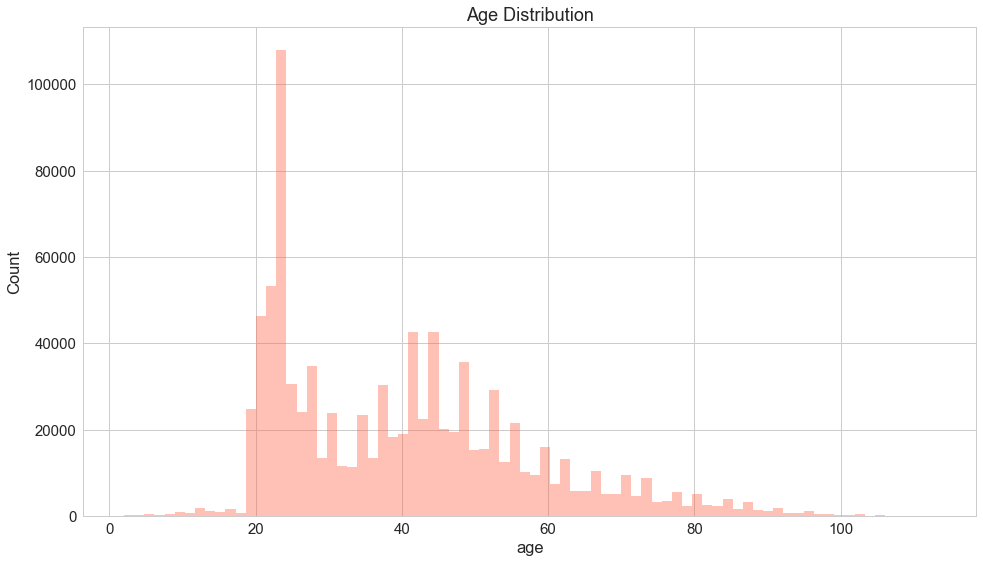

In [10]:
with sns.plotting_context("notebook",font_scale=1.5):
    plt.figure(figsize=(16, 9))
    sns.set_style("whitegrid")
    sns.distplot(df["age"].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    plt.title("Age Distribution")
    plt.ylabel("Count")

In [11]:
df.loc[df.age<18, 'age'] = df.loc[(df.age>=18) & (df.age<30), 'age'].mean(skipna=True)
df.loc[df.age>100, 'age'] = df.loc[(df.age>=30) & (df.age<100), 'age'].mean(skipna=True)
df.age.fillna(df.age.mean(), inplace=True)
df.age = df.age.astype(np.int8)

C:\Users\elunden\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


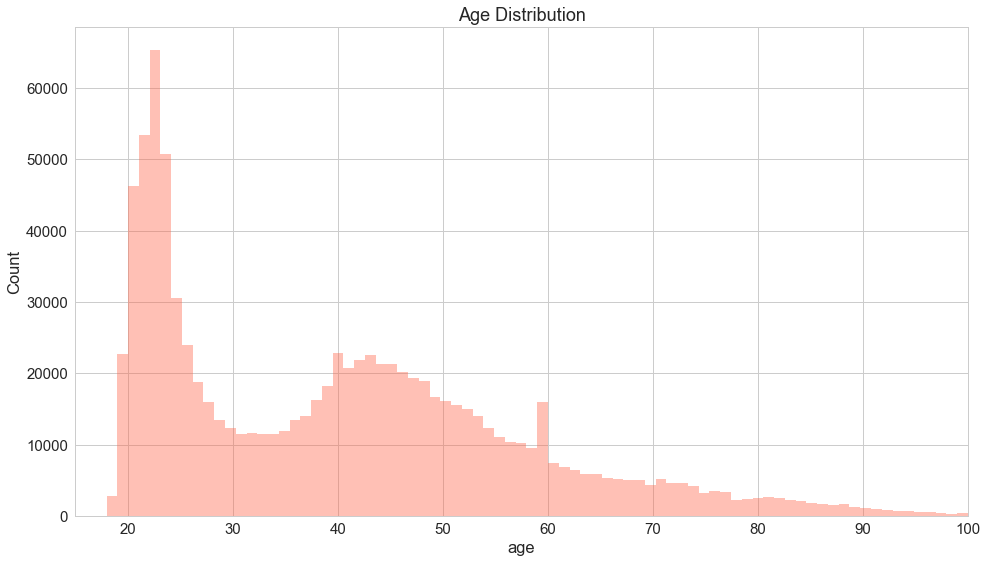

In [12]:
with sns.plotting_context("notebook",font_scale=1.5):
    plt.figure(figsize=(16, 9))
    sns.set_style("whitegrid")
    sns.distplot(df["age"].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    plt.title("Age Distribution")
    plt.ylabel("Count")
    plt.xlim((15,100))

`ind_nuevo`, if a customer is new or not

**Note that `ind_nuevo` should be a function of `fecha_dato` and `fecha_alta`**

In [13]:
df.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1', 'month'],
      dtype='object')

In [14]:
date_first_active = df.loc[df.ind_nuevo.isnull(), :].groupby('ncodpers', sort=False)['fecha_dato'].size()
date_first_active.max()

6

In [15]:
df.loc[df.ind_nuevo.isnull(), 'ind_nuevo'] = 1

In [16]:
df.ind_nuevo.isnull().sum()

0

`antiguedad` Customer seniority (in months)

In [17]:
df.antiguedad.unique()

array(['     35', '     NA', '     27', '     34', '     13', '     10',
       '     33', '     23', '     21', '     28', '      6', '     20',
       '     12', '      8', '     29', '     18', '     32', '    157',
       '     15', '     22', '     36', '     38', '     37', '     26',
       '     31', '     17', '     11', '     39', '      9', '     14',
       '     24', '      0', '     30', '     25', '     16', '      5',
       '      1', '     47', '     46', '     44', '     45', '     57',
       '     58', '     48', '     56', '     52', '     59', '     40',
       '     54', '     53', '     49', '     42', '     50', '     51',
       '     55', '     41', '     62', '     61', '     60', '     63',
       '      7', '     43', '     19', '      2', '      3', '      4',
       '    165', '    164', '    128', '    143', '    216', '    156',
       '     92', '    160', '    198', '    140', '    147', '    162',
       '    141', '    117', '    154', '    161', 

In [18]:
df.antiguedad = pd.to_numeric(df.antiguedad, errors='coerce')
np.sum(df.antiguedad.isnull())

3760

The number of nulls in `antiguedad` is the same as `ind_nuevo`, maybe it's the same group of customers

**Note the method below is not strict**

In [19]:
df.loc[df.antiguedad.isnull(), 'ind_nuevo'].describe()

count    3760.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: ind_nuevo, dtype: float64

In [20]:
df.loc[df.antiguedad.isnull(), 'antiguedad'] = df.antiguedad.min()
df.loc[df.antiguedad<0, 'antiguedad'] = 0

In [21]:
df.antiguedad.isnull().sum()

0

`fecha_alta` The date in which the customer became as the first holder of a contract in the bank.

Note this is the same group of customers

In [22]:
df.fecha_alta.isnull().sum()

3760

In [23]:
dates = df.loc[:, 'fecha_alta'].sort_values().reset_index()

In [24]:
median_date = int(np.median(dates.index.values))

In [25]:
df.loc[df.fecha_alta.isnull(), 'fecha_alta'] = dates.loc[median_date, 'fecha_alta']

In [26]:
df.fecha_alta.describe()

count                  928355
unique                   6064
top       2011-08-11 00:00:00
freq                     4561
first     1995-01-16 00:00:00
last      2015-10-30 00:00:00
Name: fecha_alta, dtype: object

`indrel` 1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)

In [27]:
df.indrel.isnull().sum()

3760

In [28]:
df.loc[df.indrel.isnull(), 'indrel'] = 1

In [29]:
df.indrel = df.indrel.astype(np.int8)

`tipodom` Addres type. 1, primary address cod_prov - Province code (customer's address)

In [30]:
df.tipodom.isnull().sum()

3760

In [31]:
df.drop(['tipodom'], axis=1, inplace=True)

`cod_prov` Province code (customer's address)

In [32]:
df.cod_prov.unique()

array([13.,  8., 22., 37., 28.,  3., 39., 29., 46., 45., 15., 17., 50.,
       12., 27.,  5., 49., 11.,  9., 10.,  6.,  2., 47., 31., 36., 16.,
       23., 14., 25., 18., 41.,  7., 21., 19., nan, 34., 24., 32., 43.,
       38., 40., 33., 30., 26., 35., 42., 44., 48., 20.,  1.,  4., 52.,
       51.])

In [33]:
df.cod_prov.isnull().sum()

8626

In [34]:
#df.drop(['cod_prov'], axis=1, inplace=True)

Check missing values

In [35]:
df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
cod_prov                  True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco

`ind_activadad_cliente` Activity index (1, active customer; 0, inactive customer)

In [36]:
df.ind_actividad_cliente.unique()

array([ 0.,  1., nan])

In [37]:
df.ind_actividad_cliente.isnull().sum()

3760

In [38]:
df.loc[df.ind_actividad_cliente.isnull(), 'ind_actividad_cliente'] = df.ind_actividad_cliente.median()

In [39]:
df.ind_actividad_cliente.value_counts()

0.0    477357
1.0    450998
Name: ind_actividad_cliente, dtype: int64

`nomprov` Province name

In [40]:
df.nomprov.unique()

array(['CIUDAD REAL', 'BARCELONA', 'HUESCA', 'SALAMANCA', 'MADRID',
       'ALICANTE', 'CANTABRIA', 'MALAGA', 'VALENCIA', 'TOLEDO',
       'CORUÑA, A', 'GIRONA', 'ZARAGOZA', 'CASTELLON', 'LUGO', 'AVILA',
       'ZAMORA', 'CADIZ', 'BURGOS', 'CACERES', 'BADAJOZ', 'ALBACETE',
       'VALLADOLID', 'NAVARRA', 'PONTEVEDRA', 'CUENCA', 'JAEN', 'CORDOBA',
       'LERIDA', 'GRANADA', 'SEVILLA', 'BALEARS, ILLES', 'HUELVA',
       'GUADALAJARA', nan, 'PALENCIA', 'LEON', 'OURENSE', 'TARRAGONA',
       'SANTA CRUZ DE TENERIFE', 'SEGOVIA', 'ASTURIAS', 'MURCIA',
       'RIOJA, LA', 'PALMAS, LAS', 'SORIA', 'TERUEL', 'BIZKAIA',
       'GIPUZKOA', 'ALAVA', 'ALMERIA', 'MELILLA', 'CEUTA'], dtype=object)

There was an issue with the unicode character ñ in A Coruña. I'll manually fix it, but if anybody knows a better way to catch cases like this I would be very glad to hear it in the comments.

In [41]:
df.loc[df.nomprov=="CORU\xc3\x91A, A","nomprov"] = "CORUNA, A"

In [42]:
df.loc[df.nomprov.isnull(), 'nomprov'] = 'UNKNOWN'

`renta` Gross income of the household

In [43]:
df.renta.isnull().sum()

164932

Maybe fillna with regional median

In [44]:
incomes = df.loc[df.renta.notnull(), :].groupby('nomprov')['renta'].agg([np.median, np.std, np.mean])

In [45]:
incomes.columns = ['MedianIncome', 'StdIncome', 'MeanIncome']
incomes.sort_values('MedianIncome', ascending=False, inplace=True)
incomes.reset_index(inplace=True)
incomes.nomprov = incomes.nomprov.astype('category')

In [46]:
incomes

,nomprov,MedianIncome,StdIncome,MeanIncome
0,UNKNOWN,242701.02,NaN,242701.020000
1,NAVARRA,141417.48,33339.275096,129630.266250
2,CEUTA,141143.55,257057.335411,219171.355730
3,MADRID,140494.56,353094.010377,181202.969082
4,BARCELONA,131368.65,141212.603262,163872.550720
5,"BALEARS, ILLES",125962.23,198724.118712,164777.606502
6,GIRONA,110794.86,125743.839144,145446.480402
7,MELILLA,108997.44,263083.322955,158411.906265
8,ZARAGOZA,102144.60,88088.669752,113643.678641
9,PONTEVEDRA,97642.02,65373.756326,112156.337895


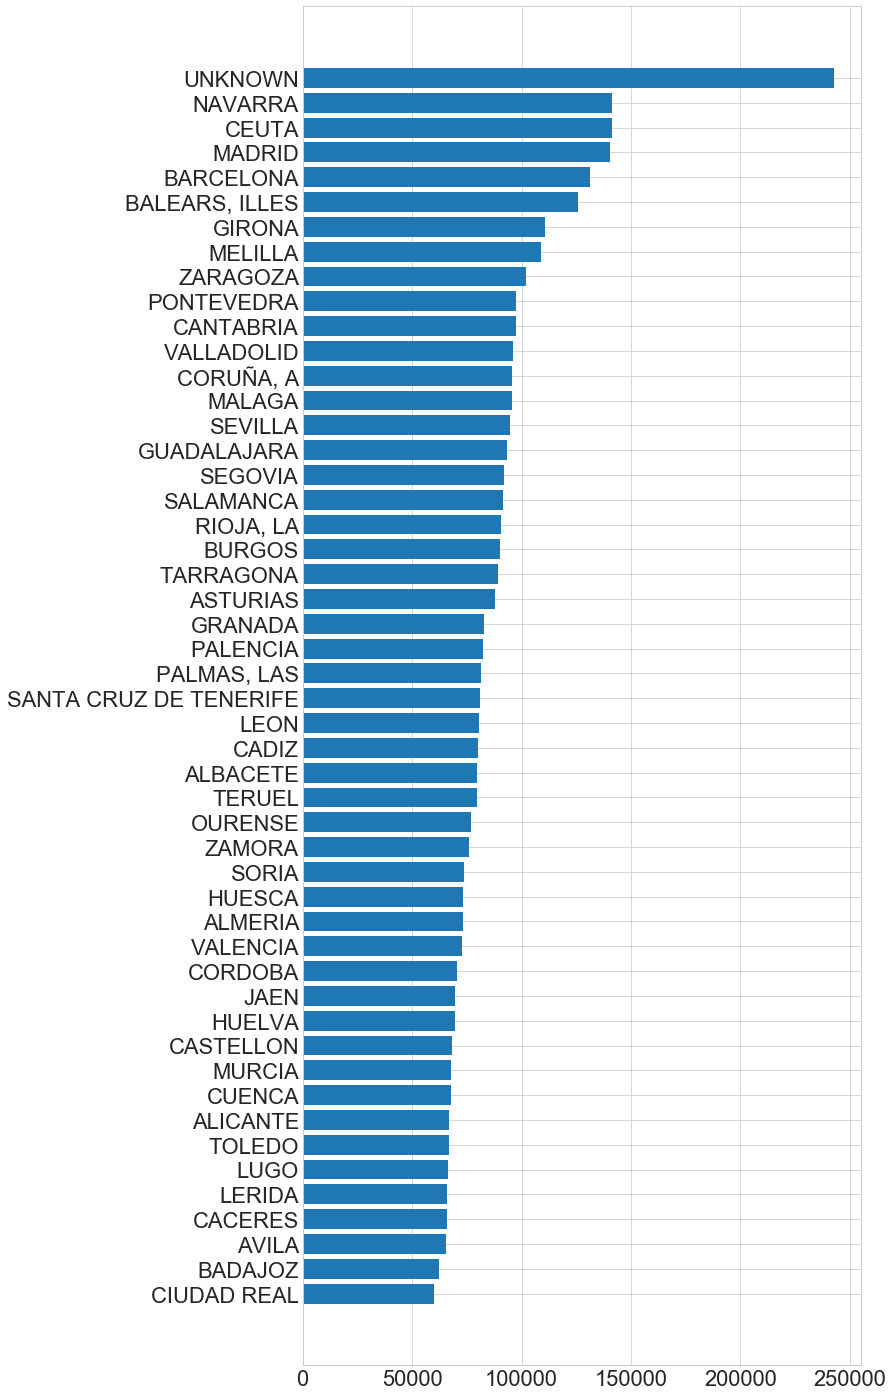

In [47]:
plt.figure(figsize=(10, 25))
plt.rcParams.update({'font.size': 22})
plt.barh(incomes.nomprov, incomes.MedianIncome)
plt.gca().invert_yaxis()

In [48]:
df.loc[df.nomprov=='BALEARS, ILLES', 'renta']

781         115784.40
2673         76610.16
3399        113803.20
4636              NaN
6372       1826298.54
8246        359744.16
8388              NaN
9176         92929.44
9245              NaN
9336        228682.53
9418        124206.90
9681              NaN
14303        81216.99
15143        91062.48
15827       136643.61
15900             NaN
19592             NaN
19818        69146.19
20144        68847.87
20308       141205.62
20674       185485.44
20777             NaN
21998        89579.49
22254             NaN
22572       145855.74
23296             NaN
24247       279125.13
24272             NaN
24937       116004.84
26039       152905.77
              ...    
6978922     129810.54
6980268           NaN
6980296           NaN
6981573           NaN
6982659           NaN
6982723           NaN
6982904           NaN
6983549           NaN
6984253     143341.53
6985356           NaN
6985620           NaN
6986129           NaN
6986176           NaN
6986725     115128.24
6988055   

In [49]:
if 'id' not in df.columns:
    df.reset_index(inplace=True, drop=False)
    df.rename(columns={'index': 'id'}, inplace=True)
    df.sort_values('id', inplace=True)

In [50]:
grouped        = df.groupby("nomprov").agg({"renta":lambda x: x.median(skipna=True)}).reset_index()
new_incomes    = pd.merge(df,grouped,how="inner",on="nomprov").loc[:, ['id', 'renta_y']]
new_incomes = new_incomes.rename(columns={'renta_y': 'renta'})
new_incomes.sort_values('id', inplace=True)

In [51]:
df.loc[df.renta.isnull(), 'renta'] = new_incomes.loc[df.renta.isnull(), 'renta']

In [52]:
df.loc[df.renta.isnull(), 'renta'] = df.loc[df.renta.notnull(), 'renta'].median()

In [53]:
df.isnull().any()

id                       False
fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
cod_prov                  True
nomprov                  False
ind_actividad_cliente    False
renta                    False
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp

`ind_nomina_ult1` Payroll

In [54]:
df.ind_nomina_ult1.isnull().sum()

2205

In [55]:
df.ind_nomina_ult1.value_counts()

0.0    871546
1.0     54604
Name: ind_nomina_ult1, dtype: int64

In [56]:
df.loc[df.ind_nomina_ult1.isnull(), 'ind_nomina_ult1'] = 0

`ind_nom_pens_ult1` Pensions

In [57]:
df.ind_nom_pens_ult1.isnull().sum()

2205

In [58]:
df.ind_nom_pens_ult1.value_counts()

0.0    866843
1.0     59307
Name: ind_nom_pens_ult1, dtype: int64

In [59]:
df.loc[df.ind_nom_pens_ult1.isnull(), 'ind_nom_pens_ult1'] = 0

Columns with only string data

In [60]:
string_data = df.select_dtypes(include='object')
missing_columns = [c for c in string_data if string_data[c].isnull().any()]

for c in missing_columns:
    print('Unique values for {}:\n{}\n'.format(c, string_data[c].unique()))
del string_data
gc.collect()

Unique values for ind_empleado:
['N' nan 'F' 'A' 'B']

Unique values for pais_residencia:
['ES' nan 'CL' 'NL' 'GB' 'DE' 'AR' 'EC' 'MX' 'CR' 'CH' 'AE' 'IE' 'US' 'RO'
 'CO' 'GA' 'MA' 'IT' 'CN' 'PT' 'BR' 'QA' 'LU' 'AU' 'BO' 'BE' 'FR' 'CA'
 'MD' 'IL' 'PL' 'HR' 'GQ' 'SE' 'CU' 'UY' 'CM' 'BG' 'UA' 'DZ' 'DK' 'TH'
 'SV' 'HN' 'PE' 'VE' 'SK' 'SG' 'DO' 'AT' 'KW' 'RU' 'NZ' 'KH' 'GI' 'SL'
 'PY' 'KR' 'CG' 'LV' 'NG' 'IN' 'ML' 'MZ' 'AO' 'PR' 'BY' 'GR' 'TR' 'FI']

Unique values for sexo:
['V' 'H' nan]

Unique values for ult_fec_cli_1t:
[nan '2015-07-02' '2015-07-23' '2015-07-06' '2015-07-30' '2015-07-29'
 '2015-07-27' '2015-07-20' '2015-07-24' '2015-07-16' '2015-07-01'
 '2015-07-21' '2015-07-07' '2015-07-14' '2015-07-09' '2015-07-17'
 '2015-07-28' '2015-07-03' '2015-07-22' '2015-07-13' '2015-07-15'
 '2015-07-10' '2015-07-08' '2015-08-18' '2015-08-25' '2015-08-13'
 '2015-08-28' '2015-08-12' '2015-08-11' '2015-08-27' '2015-08-20'
 '2015-08-04' '2015-08-07' '2015-08-24' '2015-08-26' '2015-08-03'
 '2015-08-

20505

Some of these string columns are filled with 'UNKONWN', whereas others are filled with the most common category, depending on which makes more sense.

`indfall` Deceased index. N/S, if the customer is dead, S is yes, N is no, I guess.

In [61]:
df.indfall.value_counts()

N    922064
S      2531
Name: indfall, dtype: int64

In [62]:
df.loc[df.indfall.isnull(), 'indfall'] = 'N'

`tiprel_1mes` Customer type at the beginning of the month,

Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential)

In [63]:
df.tiprel_1mes.value_counts(dropna=False)

I      469599
A      444500
NaN     14013
P         196
R          47
Name: tiprel_1mes, dtype: int64

In [64]:
df.loc[df.tiprel_1mes.isnull(), 'tiprel_1mes'] = 'A'
df.tiprel_1mes = df.tiprel_1mes.astype('category')

`indrel_1mes`

Customer type at the beginning of the month ,1 (First/Primary customer), 2 (co-owner ),P (Potential),3 (former primary), 4(former co-owner)

In [65]:
df.indrel_1mes.value_counts(dropna=False)

1.0    634315
1.0    182651
1       97094
NaN     14013
3.0        73
3.0        68
P          47
3          42
2          14
2.0        13
2.0        12
4.0         7
4           3
4.0         3
Name: indrel_1mes, dtype: int64

In [66]:
map_dict = { 1.0  : "1",
            "1.0" : "1",
            "1"   : "1",
            "3.0" : "3",
            "P"   : "P",
            3.0   : "3",
            2.0   : "2",
            "3"   : "3",
            "2.0" : "2",
            "4.0" : "4",
            "4"   : "4",
            "2"   : "2"}

In [67]:
df.indrel_1mes.fillna('P', inplace=True)
df.indrel_1mes = df.indrel_1mes.map(map_dict)

In [68]:
df.indrel_1mes.value_counts(dropna=False)

1      914060
P       14060
3         183
2          39
4          10
NaN         3
Name: indrel_1mes, dtype: int64

The rest of the string columns

In [69]:
column_null = [c for c in df if df[c].isnull().any()]

In [70]:
for c in column_null:
    print('{}, {}'.format(c, df[c].dtype))

ind_empleado, object
pais_residencia, object
sexo, object
ult_fec_cli_1t, object
indrel_1mes, object
indresi, object
indext, object
conyuemp, object
canal_entrada, object
cod_prov, float64
segmento, object


In [71]:
df.drop(['cod_prov'], axis=1, inplace=True)

In [72]:
column_null = [c for c in df if df[c].isnull().any()]
for c in column_null:
    try:
        df.loc[df[c].isnull(), c] = 'UNKNOWN'
    except:
        pass

In [73]:
feature_cols = df.iloc[:1, :].filter(regex='ind_.*ult.*').columns.values

In [74]:
feature_cols

array(['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype=object)

In [75]:
for c in feature_cols:
    df[c] = df[c].astype(int)

Now for the main event. To study trends in customers adding or removing services, I will create a label for each product and month that indicates whether a customer added, dropped or maintained that service in that billing cycle. I will do this by assigning a numeric id to each unique time stamp, and then matching each entry with the one from the previous month. The difference in the indicator value for each product then gives the desired value.

In [76]:
unique_months = pd.DataFrame(pd.Series(df.fecha_dato.unique()).sort_values()).reset_index(drop=True)

In [77]:
unique_months["month_id"] = pd.Series(range(1,1+unique_months.size)) # start with month 1, not 0 to match what we already have
unique_months["month_next_id"] = 1 + unique_months["month_id"]
unique_months.rename(columns={0:"fecha_dato"},inplace=True)

In [78]:
df = pd.merge(df, unique_months, on='fecha_dato')

In [79]:
def status_change(x):
    diffs = x.diff().fillna(0).map({1: 'Added', 
                                    -1: 'Dropped', 
                                    0: 'Maintained'})
    # first occurrence will be considered Maintained, 
    
    #which is a little lazy. A better way would be to check if 
    #the earliest date was the same as the earliest we have in the dataset
    #and consider those separately. Entries with earliest dates later than that have 
    #joined and should be labeled as "Added"
    
    #label = ["Added" if i==1 \
    #     else "Dropped" if i==-1 \
    #     else "Maintained" for i in diffs]
    return diffs

In [80]:
dg = df.copy()

In [81]:
dg.loc[:, feature_cols] = df.loc[:, [i for i in feature_cols]+["ncodpers"]].groupby("ncodpers").transform(status_change)

In [ ]:
dg = pd.melt(dg, id_vars   = [col for col in df.columns if col not in feature_cols],
            value_vars= [col for col in feature_cols])

In [ ]:
dg

In [ ]:
dg = dg.loc[dg.value!='Maintained', :]

In [ ]:
dg.T